In [1]:
###########################
#Case Study: Telecom Churn
#Author: Ambrish Gupta
#Date:June 08,2018
##########################    
    
####### import packages 
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

os.chdir("C:/Users/ajohn021/Documents/GitHub/IIITB_MachineLearning/Assignment- Telecom Churn")

####Flag to determine if we want to use PCA in modeling or not
PCA_Flag=True

####Flag to determine if we want to use class imbalance in modeling or not
class_imbalance=True

In [2]:
### read the csv file
telecom_churn = pd.read_csv('telecom_churn_data.csv')
telecom_churn.info()
telecom_churn.shape
telecom_churn.head()
telecom_churn.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [3]:
###  % of NAs in each column
round(100*(telecom_churn.isnull().sum()/len(telecom_churn.index)),2)


mobile_number            0.00
circle_id                0.00
loc_og_t2o_mou           1.02
std_og_t2o_mou           1.02
loc_ic_t2o_mou           1.02
last_date_of_month_6     0.00
last_date_of_month_7     0.60
last_date_of_month_8     1.10
last_date_of_month_9     1.66
arpu_6                   0.00
arpu_7                   0.00
arpu_8                   0.00
arpu_9                   0.00
onnet_mou_6              3.94
onnet_mou_7              3.86
onnet_mou_8              5.38
onnet_mou_9              7.75
offnet_mou_6             3.94
offnet_mou_7             3.86
offnet_mou_8             5.38
offnet_mou_9             7.75
roam_ic_mou_6            3.94
roam_ic_mou_7            3.86
roam_ic_mou_8            5.38
roam_ic_mou_9            7.75
roam_og_mou_6            3.94
roam_og_mou_7            3.86
roam_og_mou_8            5.38
roam_og_mou_9            7.75
loc_og_t2t_mou_6         3.94
                        ...  
arpu_2g_9               74.08
night_pck_user_6        74.85
night_pck_

In [4]:
#### Data Processing & data Cleaning 

### Fisrt do the missing imputation for the columns which will be used for filtering the high end customers.
telecom_churn.total_rech_amt_6.fillna(value=0, inplace=True)
telecom_churn.total_rech_amt_7.fillna(value=0, inplace=True)
telecom_churn.total_rech_amt_8.fillna(value=0, inplace=True)
telecom_churn.total_rech_amt_9.fillna(value=0, inplace=True)

telecom_churn.av_rech_amt_data_6.fillna(value=0, inplace=True)
telecom_churn.av_rech_amt_data_7.fillna(value=0, inplace=True)
telecom_churn.av_rech_amt_data_8.fillna(value=0, inplace=True)
telecom_churn.av_rech_amt_data_9.fillna(value=0, inplace=True)

telecom_churn.total_rech_data_6.fillna(value=0, inplace=True)
telecom_churn.total_rech_data_7.fillna(value=0, inplace=True)
telecom_churn.total_rech_data_8.fillna(value=0, inplace=True)
telecom_churn.total_rech_data_9.fillna(value=0, inplace=True)

telecom_churn.max_rech_data_6.fillna(value=0, inplace=True)
telecom_churn.max_rech_data_7.fillna(value=0, inplace=True)
telecom_churn.max_rech_data_8.fillna(value=0, inplace=True)
telecom_churn.max_rech_data_9.fillna(value=0, inplace=True)

  

### Renaming the vbc variables ####
telecom_churn['vbc_3g_6']=telecom_churn['jun_vbc_3g']
telecom_churn['vbc_3g_7']=telecom_churn['jul_vbc_3g']
telecom_churn['vbc_3g_8']=telecom_churn['aug_vbc_3g']
telecom_churn['vbc_3g_9']=telecom_churn['sep_vbc_3g']

telecom_churn.drop(['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','sep_vbc_3g'],axis=1,inplace=True)


In [5]:

###Finding high value accounts

telecom_churn['total_data_rech_amt_6'] = telecom_churn['total_rech_data_6']*telecom_churn['av_rech_amt_data_6']
telecom_churn['total_data_rech_amt_7'] = telecom_churn['total_rech_data_7']*telecom_churn['av_rech_amt_data_7']
telecom_churn['total_data_rech_amt_8'] = telecom_churn['total_rech_data_8']*telecom_churn['av_rech_amt_data_8']
telecom_churn['total_data_rech_amt_9'] = telecom_churn['total_rech_data_9']*telecom_churn['av_rech_amt_data_9']

telecom_churn['total_amt_6'] = telecom_churn['total_data_rech_amt_6']+telecom_churn['total_rech_amt_6']
telecom_churn['total_amt_7'] = telecom_churn['total_data_rech_amt_7']+telecom_churn['total_rech_amt_7']
telecom_churn['total_amt_8'] = telecom_churn['total_data_rech_amt_8']+telecom_churn['total_rech_amt_8']
telecom_churn['total_amt_9'] = telecom_churn['total_data_rech_amt_9']+telecom_churn['total_rech_amt_9']


telecom_churn['totalrech_avg_goodphase']=(telecom_churn['total_amt_6']+telecom_churn['total_amt_7'])/2
telecom_churn = telecom_churn[telecom_churn['totalrech_avg_goodphase'] >  telecom_churn.totalrech_avg_goodphase.quantile(0.7)]


###Adding the churn status
telecom_churn['churn_status']= ((telecom_churn.total_ic_mou_9 <=0) & (telecom_churn.total_og_mou_9 <=0)
                                & (telecom_churn.vol_2g_mb_9 <=0) & (telecom_churn.vol_3g_mb_9 <=0)).astype('int')

###91% are non-converters
telecom_churn['churn_status'].value_counts()/telecom_churn['churn_status'].shape[0]

#####removing all month 9 values,date columns and circleId
telecom_churn_sub=telecom_churn[telecom_churn.columns.drop(list(telecom_churn.filter(regex='_9')))]
telecom_churn_sub=telecom_churn_sub[telecom_churn_sub.columns.drop(list(telecom_churn_sub.filter(regex='date')))]
telecom_churn_sub.drop(['circle_id'],axis=1,inplace=True)
telecom_churn_sub.shape
print(telecom_churn_sub.shape)


(29953, 169)


In [6]:
###  % of NAs in each column for high end customers
round(100*(telecom_churn_sub.isnull().sum()/len(telecom_churn_sub.index)),2)


mobile_number               0.00
loc_og_t2o_mou              0.74
std_og_t2o_mou              0.74
loc_ic_t2o_mou              0.74
arpu_6                      0.00
arpu_7                      0.00
arpu_8                      0.00
onnet_mou_6                 1.81
onnet_mou_7                 1.79
onnet_mou_8                 3.91
offnet_mou_6                1.81
offnet_mou_7                1.79
offnet_mou_8                3.91
roam_ic_mou_6               1.81
roam_ic_mou_7               1.79
roam_ic_mou_8               3.91
roam_og_mou_6               1.81
roam_og_mou_7               1.79
roam_og_mou_8               3.91
loc_og_t2t_mou_6            1.81
loc_og_t2t_mou_7            1.79
loc_og_t2t_mou_8            3.91
loc_og_t2m_mou_6            1.81
loc_og_t2m_mou_7            1.79
loc_og_t2m_mou_8            3.91
loc_og_t2f_mou_6            1.81
loc_og_t2f_mou_7            1.79
loc_og_t2f_mou_8            3.91
loc_og_t2c_mou_6            1.81
loc_og_t2c_mou_7            1.79
          

In [7]:
## Replacing NAs with  -1 

telecom_churn_sub.night_pck_user_6.fillna(value=-1, inplace=True)
telecom_churn_sub.night_pck_user_7.fillna(value=-1, inplace=True)
telecom_churn_sub.night_pck_user_8.fillna(value=-1, inplace=True)

telecom_churn_sub.fb_user_6.fillna(value=-1, inplace=True)
telecom_churn_sub.fb_user_7.fillna(value=-1, inplace=True)
telecom_churn_sub.fb_user_8.fillna(value=-1, inplace=True)


In [8]:
###  % of NAs in each column for high end customers
round(100*(telecom_churn_sub.isnull().sum()/len(telecom_churn_sub.index)),2)[round(100*(telecom_churn_sub.isnull().sum()/len(telecom_churn_sub.index)),2)>0]

loc_og_t2o_mou       0.74
std_og_t2o_mou       0.74
loc_ic_t2o_mou       0.74
onnet_mou_6          1.81
onnet_mou_7          1.79
onnet_mou_8          3.91
offnet_mou_6         1.81
offnet_mou_7         1.79
offnet_mou_8         3.91
roam_ic_mou_6        1.81
roam_ic_mou_7        1.79
roam_ic_mou_8        3.91
roam_og_mou_6        1.81
roam_og_mou_7        1.79
roam_og_mou_8        3.91
loc_og_t2t_mou_6     1.81
loc_og_t2t_mou_7     1.79
loc_og_t2t_mou_8     3.91
loc_og_t2m_mou_6     1.81
loc_og_t2m_mou_7     1.79
loc_og_t2m_mou_8     3.91
loc_og_t2f_mou_6     1.81
loc_og_t2f_mou_7     1.79
loc_og_t2f_mou_8     3.91
loc_og_t2c_mou_6     1.81
loc_og_t2c_mou_7     1.79
loc_og_t2c_mou_8     3.91
loc_og_mou_6         1.81
loc_og_mou_7         1.79
loc_og_mou_8         3.91
                    ...  
std_ic_t2f_mou_6     1.81
std_ic_t2f_mou_7     1.79
std_ic_t2f_mou_8     3.91
std_ic_t2o_mou_6     1.81
std_ic_t2o_mou_7     1.79
std_ic_t2o_mou_8     3.91
std_ic_mou_6         1.81
std_ic_mou_7

In [9]:
####### Removing columns having negative values
telecom_churn_sub.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8','arpu_3g_6','arpu_3g_7','arpu_3g_8'],axis=1,inplace=True)

####### Removing columns which have only 0 values
telecom_churn_sub.drop(['loc_og_t2o_mou','std_og_t2o_mou','loc_ic_t2o_mou', 
                        'std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8',
                        'std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8'],axis=1,inplace=True)

####### Removing all dates related columns
telecom_churn_sub.drop(['last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'],axis=1,inplace=True)


####### Removing columns which have only 0 values
telecom_churn_sub.drop(['mobile_number','totalrech_avg_goodphase'],axis=1,inplace=True)


print(telecom_churn_sub.shape)


(29953, 149)


In [10]:
###  % of NAs in each column for high end customers
round(100*(telecom_churn_sub.isnull().sum()/len(telecom_churn_sub.index)),2)[round(100*(telecom_churn_sub.isnull().sum()/len(telecom_churn_sub.index)),2)>0]

onnet_mou_6          1.81
onnet_mou_7          1.79
onnet_mou_8          3.91
offnet_mou_6         1.81
offnet_mou_7         1.79
offnet_mou_8         3.91
roam_ic_mou_6        1.81
roam_ic_mou_7        1.79
roam_ic_mou_8        3.91
roam_og_mou_6        1.81
roam_og_mou_7        1.79
roam_og_mou_8        3.91
loc_og_t2t_mou_6     1.81
loc_og_t2t_mou_7     1.79
loc_og_t2t_mou_8     3.91
loc_og_t2m_mou_6     1.81
loc_og_t2m_mou_7     1.79
loc_og_t2m_mou_8     3.91
loc_og_t2f_mou_6     1.81
loc_og_t2f_mou_7     1.79
loc_og_t2f_mou_8     3.91
loc_og_t2c_mou_6     1.81
loc_og_t2c_mou_7     1.79
loc_og_t2c_mou_8     3.91
loc_og_mou_6         1.81
loc_og_mou_7         1.79
loc_og_mou_8         3.91
std_og_t2t_mou_6     1.81
std_og_t2t_mou_7     1.79
std_og_t2t_mou_8     3.91
                    ...  
loc_ic_mou_6         1.81
loc_ic_mou_7         1.79
loc_ic_mou_8         3.91
std_ic_t2t_mou_6     1.81
std_ic_t2t_mou_7     1.79
std_ic_t2t_mou_8     3.91
std_ic_t2m_mou_6     1.81
std_ic_t2m_m

In [11]:

## Now almosst all the variables "_mou" variables. "count_rech_2g_X" are NAs when there "vol_2g_mb_X" are zeros.     
## Replacing NA's with zero values for all the columns
telecom_churn_NAsToZero=telecom_churn_sub.apply(lambda x: x.fillna(0,axis=0))
print(telecom_churn_NAsToZero.shape)


(29953, 149)


In [12]:
#### Derived Variable
##############


telecom_churn_NAsToZero['total_amt_tmp']=(telecom_churn_NAsToZero['total_amt_6']+telecom_churn_NAsToZero['total_amt_7'])/2
telecom_churn_NAsToZero['total_data_rech_amt_tmp']=(telecom_churn_NAsToZero['total_data_rech_amt_6']+telecom_churn_NAsToZero['total_data_rech_amt_7'])/2
telecom_churn_NAsToZero['arpu_tmp']=(telecom_churn_NAsToZero['arpu_6']+telecom_churn_NAsToZero['arpu_7'])/2
telecom_churn_NAsToZero['onnet_mou_tmp']=(telecom_churn_NAsToZero['onnet_mou_6']+telecom_churn_NAsToZero['onnet_mou_7'])/2
telecom_churn_NAsToZero['offnet_mou_tmp']=(telecom_churn_NAsToZero['offnet_mou_6']+telecom_churn_NAsToZero['offnet_mou_7'])/2
telecom_churn_NAsToZero['loc_og_t2t_mou_tmp']=(telecom_churn_NAsToZero['loc_og_t2t_mou_6']+telecom_churn_NAsToZero['loc_og_t2t_mou_7'])/2
telecom_churn_NAsToZero['loc_og_t2m_mou_tmp']=(telecom_churn_NAsToZero['loc_og_t2m_mou_6']+telecom_churn_NAsToZero['loc_og_t2m_mou_7'])/2
telecom_churn_NAsToZero['loc_og_t2f_mou_tmp']=(telecom_churn_NAsToZero['loc_og_t2f_mou_6']+telecom_churn_NAsToZero['loc_og_t2f_mou_7'])/2
telecom_churn_NAsToZero['loc_og_t2c_mou_tmp']=(telecom_churn_NAsToZero['loc_og_t2c_mou_6']+telecom_churn['loc_og_t2c_mou_7'])/2
telecom_churn_NAsToZero['loc_og_mou_tmp']=(telecom_churn_NAsToZero['loc_og_mou_6']+telecom_churn_NAsToZero['loc_og_mou_7'])/2
telecom_churn_NAsToZero['std_og_t2t_mou_tmp']=(telecom_churn_NAsToZero['std_og_t2t_mou_6']+telecom_churn_NAsToZero['std_og_t2t_mou_7'])/2
telecom_churn_NAsToZero['std_og_t2m_mou_tmp']=(telecom_churn['std_og_t2m_mou_6']+telecom_churn_NAsToZero['std_og_t2m_mou_7'])/2
telecom_churn_NAsToZero['std_og_mou_tmp']=(telecom_churn_NAsToZero['std_og_mou_6']+telecom_churn_NAsToZero['std_og_mou_7'])/2
telecom_churn_NAsToZero['total_og_mou_tmp']=(telecom_churn_NAsToZero['total_og_mou_6']+telecom_churn_NAsToZero['total_og_mou_7'])/2
telecom_churn_NAsToZero['loc_ic_t2t_mou_tmp']=(telecom_churn_NAsToZero['loc_ic_t2t_mou_6']+telecom_churn_NAsToZero['loc_ic_t2t_mou_7'])/2
telecom_churn_NAsToZero['loc_ic_t2m_mou_tmp']=(telecom_churn_NAsToZero['loc_ic_t2m_mou_6']+telecom_churn_NAsToZero['loc_ic_t2m_mou_7'])/2
telecom_churn_NAsToZero['loc_ic_mou_tmp']=(telecom_churn_NAsToZero['loc_ic_mou_6']+telecom_churn_NAsToZero['loc_ic_mou_7'])/2
telecom_churn_NAsToZero['std_ic_t2t_mou_tmp']=(telecom_churn_NAsToZero['std_ic_t2t_mou_6']+telecom_churn_NAsToZero['std_ic_t2t_mou_7'])/2
telecom_churn_NAsToZero['std_ic_t2m_mou_tmp']=(telecom_churn_NAsToZero['std_ic_t2m_mou_6']+telecom_churn_NAsToZero['std_ic_t2m_mou_7'])/2
telecom_churn_NAsToZero['std_ic_mou_tmp']=(telecom_churn_NAsToZero['std_ic_mou_6']+telecom_churn_NAsToZero['std_ic_mou_7'])/2
telecom_churn_NAsToZero['total_ic_mou_tmp']=(telecom_churn_NAsToZero['total_ic_mou_6']+telecom_churn_NAsToZero['total_ic_mou_7'])/2
telecom_churn_NAsToZero['isd_ic_mou_tmp']=(telecom_churn_NAsToZero['isd_ic_mou_6']+telecom_churn_NAsToZero['isd_ic_mou_7'])/2
telecom_churn_NAsToZero['total_rech_num_tmp']=(telecom_churn_NAsToZero['total_rech_num_6']+telecom_churn_NAsToZero['total_rech_num_7'])/2
telecom_churn_NAsToZero['total_rech_amt_tmp']=(telecom_churn_NAsToZero['total_rech_amt_6']+telecom_churn_NAsToZero['total_rech_amt_7'])/2
telecom_churn_NAsToZero['max_rech_amt_tmp']=(telecom_churn_NAsToZero['max_rech_amt_6']+telecom_churn_NAsToZero['max_rech_amt_7'])/2
telecom_churn_NAsToZero['max_rech_data_tmp']=(telecom_churn_NAsToZero['max_rech_data_6']+telecom_churn_NAsToZero['max_rech_data_7'])/2
telecom_churn_NAsToZero['av_rech_amt_data_tmp']=(telecom_churn_NAsToZero['av_rech_amt_data_6']+telecom_churn_NAsToZero['av_rech_amt_data_7'])/2
telecom_churn_NAsToZero['vol_2g_mb_tmp']=(telecom_churn_NAsToZero['vol_2g_mb_6']+telecom_churn_NAsToZero['vol_2g_mb_7'])/2
telecom_churn_NAsToZero['vol_3g_mb_tmp']=(telecom_churn_NAsToZero['vol_3g_mb_6']+telecom_churn_NAsToZero['vol_3g_mb_7'])/2
telecom_churn_NAsToZero['vbc_3g_tmp']=(telecom_churn_NAsToZero['vbc_3g_6']+telecom_churn_NAsToZero['vbc_3g_7'])/2



In [13]:
telecom_churn_NAsToZero.shape

Var_list=telecom_churn_NAsToZero.columns
print(Var_list.shape)

(179,)


In [14]:
def cor_plot(df):
    
    sns.set(style="white")
    sns.set_context("talk")
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(30,15))
    sns.heatmap(corr, cmap="YlGnBu",square=True)

In [15]:

### Total Roaming  IC & OG  ### 
telecom_churn_NAsToZero['total_roam_ic_mou']  =telecom_churn_NAsToZero['roam_ic_mou_6'] + telecom_churn_NAsToZero['roam_ic_mou_7']+telecom_churn_NAsToZero['roam_ic_mou_8']
telecom_churn_NAsToZero['total_roam_og_mou']=telecom_churn_NAsToZero['roam_og_mou_6'] + telecom_churn_NAsToZero['roam_og_mou_7']+telecom_churn_NAsToZero['roam_og_mou_8']

### Total IC & OG  ### 
telecom_churn_NAsToZero['total_ic_mou']=telecom_churn_NAsToZero['total_ic_mou_6'] + telecom_churn_NAsToZero['total_ic_mou_7']+telecom_churn_NAsToZero['total_ic_mou_8']
telecom_churn_NAsToZero['total_og_mou']=telecom_churn_NAsToZero['total_og_mou_6'] + telecom_churn_NAsToZero['total_og_mou_7']+telecom_churn_NAsToZero['total_og_mou_8']

#### Roaming Percent

telecom_churn_NAsToZero['total_roam_ic_pct']=(100*telecom_churn_NAsToZero['total_roam_ic_mou']/telecom_churn_NAsToZero['total_ic_mou']).astype('float')
telecom_churn_NAsToZero['total_roam_og_pct']=(100*telecom_churn_NAsToZero['total_roam_og_mou']/telecom_churn_NAsToZero['total_og_mou']).astype('float')



In [16]:
### Creating Flag if the 8 month usage is less than 50% of  average of 6 & 7 month usage

telecom_churn_NAsToZero['total_amt_flag']=(telecom_churn_NAsToZero['total_amt_8']<telecom_churn_NAsToZero['total_amt_tmp']/2).astype('int')
telecom_churn_NAsToZero['total_data_rech_amt_flag']=(telecom_churn_NAsToZero['total_data_rech_amt_8']<telecom_churn_NAsToZero['total_data_rech_amt_tmp']/2).astype('int')


telecom_churn_NAsToZero['arpu_flag']=(telecom_churn_NAsToZero['arpu_8']<telecom_churn_NAsToZero['arpu_tmp']/2).astype('int')
telecom_churn_NAsToZero['onnet_mou_flag']=(telecom_churn_NAsToZero['onnet_mou_8']<telecom_churn_NAsToZero['onnet_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['offnet_mou_flag']=(telecom_churn_NAsToZero['offnet_mou_8']<telecom_churn_NAsToZero['offnet_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['loc_og_t2t_mou_flag']=(telecom_churn_NAsToZero['loc_og_t2t_mou_8']<telecom_churn_NAsToZero['loc_og_t2t_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['loc_og_t2m_mou_flag']=(telecom_churn_NAsToZero['loc_og_t2m_mou_8']<telecom_churn_NAsToZero['loc_og_t2m_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['loc_og_t2f_mou_flag']=(telecom_churn_NAsToZero['loc_og_t2f_mou_8']<telecom_churn_NAsToZero['loc_og_t2f_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['loc_og_t2c_mou_flag']=(telecom_churn_NAsToZero['loc_og_t2c_mou_8']<telecom_churn_NAsToZero['loc_og_t2c_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['loc_og_mou_flag']=(telecom_churn_NAsToZero['loc_og_mou_8']<telecom_churn_NAsToZero['loc_og_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['std_og_t2t_mou_flag']=(telecom_churn_NAsToZero['std_og_t2t_mou_8']<telecom_churn_NAsToZero['std_og_t2t_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['std_og_t2m_mou_flag']=(telecom_churn['std_og_t2m_mou_8']<telecom_churn_NAsToZero['std_og_t2m_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['std_og_mou_flag']=(telecom_churn_NAsToZero['std_og_mou_8']<telecom_churn_NAsToZero['std_og_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['total_og_mou_flag']=(telecom_churn_NAsToZero['total_og_mou_8']<telecom_churn_NAsToZero['total_og_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['loc_ic_t2t_mou_flag']=(telecom_churn_NAsToZero['loc_ic_t2t_mou_8']<telecom_churn_NAsToZero['loc_ic_t2t_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['loc_ic_t2m_mou_flag']=(telecom_churn_NAsToZero['loc_ic_t2m_mou_8']<telecom_churn_NAsToZero['loc_ic_t2m_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['loc_ic_mou_flag']=(telecom_churn_NAsToZero['loc_ic_mou_8']<telecom_churn_NAsToZero['loc_ic_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['std_ic_t2t_mou_flag']=(telecom_churn_NAsToZero['std_ic_t2t_mou_8']<telecom_churn_NAsToZero['std_ic_t2t_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['std_ic_t2m_mou_flag']=(telecom_churn_NAsToZero['std_ic_t2m_mou_8']<telecom_churn_NAsToZero['std_ic_t2m_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['std_ic_mou_flag']=(telecom_churn_NAsToZero['std_ic_mou_8']<telecom_churn_NAsToZero['std_ic_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['total_ic_mou_flag']=(telecom_churn_NAsToZero['total_ic_mou_8']<telecom_churn_NAsToZero['total_ic_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['isd_ic_mou_flag']=(telecom_churn_NAsToZero['isd_ic_mou_8']<telecom_churn_NAsToZero['isd_ic_mou_tmp']/2).astype('int')
telecom_churn_NAsToZero['total_rech_num_flag']=(telecom_churn_NAsToZero['total_rech_num_8']<telecom_churn_NAsToZero['total_rech_num_tmp']/2).astype('int')
telecom_churn_NAsToZero['total_rech_amt_flag']=(telecom_churn_NAsToZero['total_rech_amt_8']<telecom_churn_NAsToZero['total_rech_amt_tmp']/2).astype('int')
telecom_churn_NAsToZero['max_rech_amt_flag']=(telecom_churn_NAsToZero['max_rech_amt_8']<telecom_churn_NAsToZero['max_rech_amt_tmp']/2).astype('int')
telecom_churn_NAsToZero['max_rech_data_flag']=(telecom_churn_NAsToZero['max_rech_data_8']<telecom_churn_NAsToZero['max_rech_data_tmp']/2).astype('int')
telecom_churn_NAsToZero['av_rech_amt_data_flag']=(telecom_churn_NAsToZero['av_rech_amt_data_8']<telecom_churn_NAsToZero['av_rech_amt_data_tmp']/2).astype('int')
telecom_churn_NAsToZero['vol_2g_mb_flag']=(telecom_churn_NAsToZero['vol_2g_mb_8']<telecom_churn_NAsToZero['vol_2g_mb_tmp']/2).astype('int')
telecom_churn_NAsToZero['vol_3g_mb_flag']=(telecom_churn_NAsToZero['vol_3g_mb_8']<telecom_churn_NAsToZero['vol_3g_mb_tmp']/2).astype('int')
telecom_churn_NAsToZero['vbc_3g_flag']=(telecom_churn_NAsToZero['vbc_3g_8']<telecom_churn_NAsToZero['vbc_3g_tmp']/2).astype('int')


In [17]:
#telecom_churn_NAsToZero.to_csv("telecom_churn_NAsToZero_111.csv")

In [18]:
### Creating Dummy Variables
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
night_pck_user_6 = pd.get_dummies(telecom_churn_NAsToZero['night_pck_user_6'],prefix='night_pck_user_6',drop_first=True)
night_pck_user_7 = pd.get_dummies(telecom_churn_NAsToZero['night_pck_user_7'],prefix='night_pck_user_7',drop_first=True)
night_pck_user_8 = pd.get_dummies(telecom_churn_NAsToZero['night_pck_user_8'],prefix='night_pck_user_8',drop_first=True)

fb_user_6 = pd.get_dummies(telecom_churn_NAsToZero['fb_user_6'],prefix='fb_user_6',drop_first=True)
fb_user_7 = pd.get_dummies(telecom_churn_NAsToZero['fb_user_7'],prefix='fb_user_7',drop_first=True)
fb_user_8 = pd.get_dummies(telecom_churn_NAsToZero['fb_user_8'],prefix='fb_user_8',drop_first=True)


#Adding the results to the master dataframe
telecom_churn_NAsToZero = pd.concat([telecom_churn_NAsToZero,night_pck_user_6,night_pck_user_7,night_pck_user_8],axis=1)
telecom_churn_NAsToZero = pd.concat([telecom_churn_NAsToZero,fb_user_6,fb_user_7,fb_user_8],axis=1)



In [19]:

##### Data with key variables +  derived variables only
print(telecom_churn_NAsToZero.shape)

New_Var_list=telecom_churn_NAsToZero.columns
print(New_Var_list.shape)
Add_Var=["aon","churn_status"]
Imp_Var_list=list(set(New_Var_list)-set(Var_list)) 

Final_Var_list=Imp_Var_list+Add_Var
print(Final_Var_list)

Modeling_Data=telecom_churn_NAsToZero[Final_Var_list]

Modeling_Data=Modeling_Data.apply(lambda x: x.fillna(0,axis=0))
Modeling_Data=Modeling_Data.replace(np.inf,0)

#Modeling_Data.to_csv("Modeling_Data_2.csv")

##### Checking the Mean
Modeling_Data_mean=Modeling_Data.groupby('churn_status')[Modeling_Data.columns].mean()
#Modeling_Data_mean.to_csv("Modeling_Data_mean.csv")



(29953, 227)
(227,)
['fb_user_6_1.0', 'av_rech_amt_data_flag', 'total_og_mou_flag', 'total_og_mou', 'loc_ic_mou_flag', 'night_pck_user_8_1.0', 'night_pck_user_7_0.0', 'onnet_mou_flag', 'vbc_3g_flag', 'std_ic_t2m_mou_flag', 'fb_user_6_0.0', 'total_rech_num_flag', 'total_roam_og_mou', 'max_rech_data_flag', 'loc_og_t2m_mou_flag', 'offnet_mou_flag', 'night_pck_user_6_1.0', 'total_roam_og_pct', 'fb_user_8_1.0', 'vol_3g_mb_flag', 'night_pck_user_6_0.0', 'std_og_t2t_mou_flag', 'fb_user_7_1.0', 'night_pck_user_8_0.0', 'loc_og_t2t_mou_flag', 'isd_ic_mou_flag', 'total_amt_flag', 'arpu_flag', 'loc_og_mou_flag', 'fb_user_7_0.0', 'loc_ic_t2t_mou_flag', 'total_rech_amt_flag', 'std_ic_mou_flag', 'total_ic_mou_flag', 'loc_og_t2f_mou_flag', 'total_roam_ic_mou', 'total_data_rech_amt_flag', 'total_roam_ic_pct', 'max_rech_amt_flag', 'std_og_t2m_mou_flag', 'night_pck_user_7_1.0', 'total_ic_mou', 'std_ic_t2t_mou_flag', 'loc_ic_t2m_mou_flag', 'loc_og_t2c_mou_flag', 'vol_2g_mb_flag', 'fb_user_8_0.0', 'std_og_

In [20]:

# splitting into X and y
X = Modeling_Data.drop("churn_status", axis = 1)
Y = Modeling_Data.churn_status.astype(int)
Y.value_counts()

#####################################################
#### if want to use the class imbalance 
#####################################################

class_imbalance=True

####Splitting 70-30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)


### Combining X_train, y_train
Training_Data=pd.concat([X_train,y_train],axis=1)
print(Training_Data.shape)

### Treating Class Imbalance

# Separate majority and minority classes

Training_Data_majority = Training_Data[Training_Data.churn_status==0]
Training_Data_minority = Training_Data[Training_Data.churn_status==1]
 
# Upsample minority class
Training_Data_minority_upsampled = resample(Training_Data_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6000,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
Training_Data_minority_Upscaled = pd.concat([Training_Data_majority, Training_Data_minority_upsampled])
 
# Display new class counts
Training_Data_minority_Upscaled.churn_status.value_counts()

if class_imbalance==True:
         X_train = Training_Data_minority_Upscaled.drop("churn_status", axis = 1)
         y_train = Training_Data_minority_Upscaled.churn_status.astype(int)


print(X_train.shape)
print(y_train.value_counts())

(20967, 50)
(25215, 49)
0    19215
1     6000
Name: churn_status, dtype: int64


In [21]:

####F1 seems to be the right metric since we are interested in identifying more churners correctly
##Recall <- Number of churners identified/Total number of churners
#####Random Forest/XG-Boost algorithms should give the best results for prediction.
### SVM takes a lot of time . So it is not advisable to use that

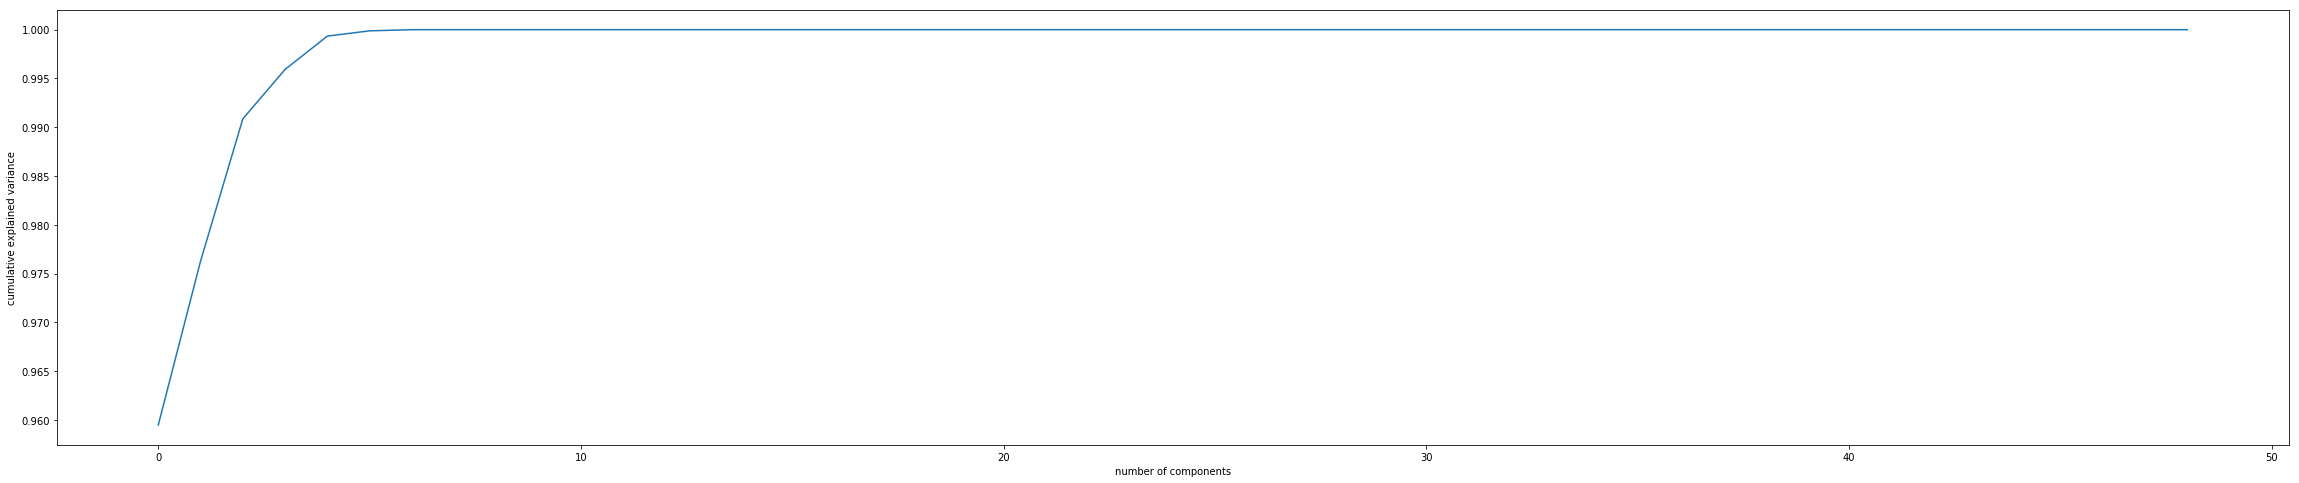

In [22]:

#################################################################################

##################################### PCA ##########################################

#################################################################################
PCA_Flag==False
##PCA capturing ~  75% of variance(25 components) ##make sure flag is set in the beginning
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(X_train)
pca.explained_variance_ratio_
pd.DataFrame(pca.explained_variance_ratio_).to_csv('variance_explained.csv')
fig = plt.figure(figsize = (40,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()
pca_final = IncrementalPCA(n_components=20)

if PCA_Flag==True:
    X_train=pca_final.fit_transform(X_train)
    X_test=pca_final.fit_transform(X_test)



In [23]:

#################################################################################

##################################### PCA ##########################################

#################################################################################


import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)


C:\Users\ajohn021\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


NameError: name 'telecom' is not defined

In [ ]:
#########################################
######Explanatory Model##################
#########################################

Model Score :  86.52
Acc_Score :  0.8722457155575339
Log: [0.86178862 0.87031529 0.86535792 0.86178862 0.86575451]
Log: 0.8650009914733294
Important Variables 

[[ 2.40336835e-05 -6.03955619e-05  4.86734716e-05 -8.64309596e-04
   9.61141285e-05  1.02928325e-03 -7.87137779e-05  9.81359542e-01
  -7.13601519e-02 -4.82788781e-01 -2.01737611e-01 -4.32675944e-01
  -4.28423031e-01  3.08078792e-01 -1.25149344e-01  7.27408385e-02
  -2.75797575e-01  6.41827943e-02  1.64573849e-01  1.33209302e-01]]
['fb_user_6_1.0', 'av_rech_amt_data_flag', 'total_og_mou_flag', 'total_og_mou', 'loc_ic_mou_flag', 'night_pck_user_8_1.0', 'night_pck_user_7_0.0', 'onnet_mou_flag', 'vbc_3g_flag', 'std_ic_t2m_mou_flag', 'fb_user_6_0.0', 'total_rech_num_flag', 'total_roam_og_mou', 'max_rech_data_flag', 'loc_og_t2m_mou_flag', 'offnet_mou_flag', 'night_pck_user_6_1.0', 'total_roam_og_pct', 'fb_user_8_1.0', 'vol_3g_mb_flag', 'night_pck_user_6_0.0', 'std_og_t2t_mou_flag', 'fb_user_7_1.0', 'night_pck_user_8_0.0', 'loc_og_t2t

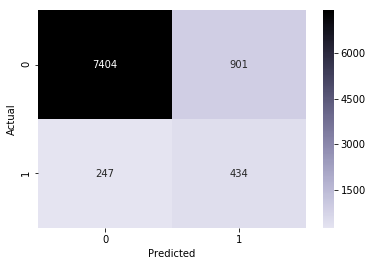

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

logreg = LogisticRegression()
results=logreg.fit(X_train,y_train)
logreg_pred = logreg.predict(X_test)

Model_log = round(logreg.score(X_train,y_train)*100,2)
print("Model Score : " ,Model_log)
Acc_log = accuracy_score(logreg_pred,y_test)
print("Acc_Score : ", Acc_log)


cnf_metrix = (metrics.confusion_matrix(y_test,logreg_pred))
cmap = sns.cubehelix_palette(50, hue=0.5, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(cnf_metrix,cmap = cmap,xticklabels=['0','1'],yticklabels=['0','1'],annot=True, fmt="d",)
plt.xlabel('Predicted')
plt.ylabel('Actual')


scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='accuracy') #fitting logistic regression to whole data with 5 fold
print("Log:",scores)
print("Log:" ,scores.mean())

A=metrics.accuracy_score(y_test, logreg_pred)
P=metrics.precision_score(y_test, logreg_pred)
R=metrics.recall_score(y_test, logreg_pred)
F1= 2/(1/P + 1/R)

print("Important Variables \n")
print(results.coef_)
print(Final_Var_list)
print(" \n")

print(metrics.confusion_matrix(y_test, logreg_pred), "\n")
print("accuracy:", A)
print("precision:",P)
print("sensitivity/recall:", R)
print("F1 Score:", F1)

In [ ]:
#########################################
######Predictive Model##################
#########################################

In [230]:
################################################################################
#####################################ADA-BOOST##########################################
#################################################################################

# base estimator
tree = DecisionTreeClassifier(max_depth=10)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=1000,
    learning_rate=1,
    algorithm="SAMME")

adaboost_model_1.fit(X_train, y_train)
y_pred = adaboost_model_1.predict(X_test)

# metrics
A=metrics.accuracy_score(y_test, y_pred)
P=metrics.precision_score(y_test, y_pred)
R=metrics.recall_score(y_test, y_pred)
F1= 2/((1/P) + (1/R))

print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", A)
print("precision",P)
print("sensitivity/recall", R)
print("F1 Score", F1)

[[8185  120]
 [ 454  227]] 

accuracy 0.936122857779
precision 0.654178674352
sensitivity/recall 0.333333333333
F1 Score 0.441634241245


In [215]:
F1 Score 0.473147518695

0.47822057460611683

In [233]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [5,7,9],
              "n_estimators": [200,500,800]
             }

# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
adaboost_model_2 = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=.5,
    algorithm="SAMME")

folds = 3
grid_search_adaboost_model_2 = GridSearchCV(adaboost_model_2, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 0)


grid_search_adaboost_model_2.fit(X_train, y_train)
y_pred = grid_search_adaboost_model_2.predict(X_test)
# metrics
# metrics
A=metrics.accuracy_score(y_test, y_pred)
P=metrics.precision_score(y_test, y_pred)
R=metrics.recall_score(y_test, y_pred)
F1= 2/((1/P) + (1/R))

print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", A)
print("precision",P)
print("sensitivity/recall", R)
print("F1 Score", F1)


[[8136  169]
 [ 407  274]] 

accuracy 0.935900289339
precision 0.618510158014
sensitivity/recall 0.40234948605
F1 Score 0.487544483986


In [ ]:
# parameter grid
param_grid = {"max_depth": [5,7,9],
              "learning_rate": [0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9],
              "n_estimators": [200,500,800]
             }

# Gradboost with the tree as base estimator
gradboost_model_1 = GradientBoostingClassifier()

# run grid search
folds = 3
grid_search_gradboost_model_1 = GridSearchCV(gradboost_model_1, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_gradboost_model_1.fit(X_train, y_train)
y_pred = grid_search_gradboost_model_1.predict(X_test)
A=metrics.accuracy_score(y_test, y_pred)
P=metrics.precision_score(y_test, y_pred)
R=metrics.recall_score(y_test, y_pred)
F1= 2/((1/P) + (1/R))

print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", A)
print("precision",P)
print("sensitivity/recall", R)
print("F1 Score", F1)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


[[7966  339]
 [ 333  348]] 

accuracy 0.925217004229
precision 0.506550218341
sensitivity/recall 0.511013215859
F1 Score 0.508771929825


In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9],
             "n_estimators": [200,500,800],
              "max_depth": [5,7,9,11]}          


                
# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
XGBoost_model = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

XGBoost_model.fit(X_train, y_train)
y_pred = XGBoost_model.predict(X_test)
A=metrics.accuracy_score(y_test, y_pred)
P=metrics.precision_score(y_test, y_pred)
R=metrics.recall_score(y_test, y_pred)
F1= 2/((1/P) + (1/R))

print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", A)
print("precision",P)
print("sensitivity/recall", R)
print("F1 Score", F1)

